<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дерево решений</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Дерево решений</a></span></li></ul></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Дерево решений</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Дерево-решения" data-toc-modified-id="Дерево-решения-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Дерево решения</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем все необходимые библиотеки для работы.

In [2]:
pip install category_encoders

  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install optuna

  Using cached optuna-3.1.0-py3-none-any.whl (365 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached alembic-1.10.2-py3-none-any.whl (212 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
import optuna
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

Откроем файл с данными, сохраним в переменную `df` и выведем первые десять строк.

In [4]:
df = pd.read_csv('churn.csv')

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Выведем информацию о датафрейме с помощью метода `info()`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df['Tenure'].isna().mean()*100

9.09

Признак `Tenure` содержит пропуски, чтобы не искажать данные удалим их.

In [8]:
df = df.dropna().reset_index(drop=True)

Признаки сохраним в переменной features, а целевой признак - в target.

In [9]:
features = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = df['Exited']

Разобьем данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно.

In [10]:
features_train, features_temp, target_train, target_temp = (
    train_test_split(features, target, test_size=0.4, random_state=322, stratify=target)
)

In [11]:
features_valid, features_test, target_valid, target_test = (
    train_test_split(features_temp, target_temp, test_size=0.5, random_state=322, stratify=target_temp)
)

Проверим корректность разбиения.

In [12]:
features_train.shape

(5454, 10)

In [13]:
features_valid.shape

(1818, 10)

In [14]:
features_test.shape

(1819, 10)

Преобразуем категориальные признаки Geography и Gender в количественные с помощью OHE.

In [15]:
ohe = ce.OneHotEncoder(drop_invariant=True)
ohe.fit(features_train)
features_train = ohe.transform(features_train)
features_valid = ohe.transform(features_valid)
features_test = ohe.transform(features_test)
features_train.head()

,CreditScore,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6269,688,1,0,0,1,0,46,3.0,0.00,2,0,1,104902.68
3896,641,0,1,0,1,0,40,7.0,0.00,1,1,0,126996.67
4692,760,0,0,1,0,1,34,6.0,121303.77,2,1,1,59325.21
4220,850,0,0,1,1,0,39,5.0,114491.82,1,1,0,99689.48
6397,563,1,0,0,0,1,57,6.0,0.00,2,1,1,39297.48


Стандартизируем численные признаки с помощью `StandardScaler`.

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,CreditScore,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6269,0.393274,1,0,0,1,0,0.684323,-0.689374,-1.214471,0.791149,0,1,0.103521
3896,-0.094186,0,1,0,1,0,0.116212,0.693685,-1.214471,-0.920444,1,0,0.485720
4692,1.140021,0,0,1,0,1,-0.451898,0.347920,0.734066,0.791149,1,1,-0.684914
4220,2.073455,0,0,1,1,0,0.021527,0.002155,0.624644,-0.920444,1,0,0.013339
6397,-0.903162,1,0,0,0,1,1.725858,0.347920,-1.214471,0.791149,1,1,-1.031369


In [17]:
target_train = target_train.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)
features_train = features_train.reset_index(drop=True)
features_valid = features_valid.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)

## Исследование задачи

Исследуем баланс классов, выведем процентное соотношение классов в целевом признаке.

In [18]:
target.value_counts(normalize=True)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

Выборка является несбалансированной, почти 80% нулей.

Сперва обучим модели без учета дисбаланса. Ипользовать будем модели решающего дерева, случайного леса и CatBoost.

### Случайный лес

С помощью Optuna подберем оптимальные гиперпараметры для модели случайного леса.

In [19]:
def objective(trial):
    # Определение гиперпараметров для модели
    n_estimators = trial.suggest_int('n_estimators', 20, 150)
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Инициализация модели со значениями гиперпараметров
    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   random_state=322)

    # Обучение модели на тренировочном наборе
    rfc.fit(features_train, target_train)

    # Предсказание на тестовом наборе
    predicted_valid = rfc.predict(features_valid)

    # Вычисление метрики качества (f1)
    f1 = f1_score(predicted_valid, target_valid)

    return f1

# Создание объекта для оптимизации
study = optuna.create_study(direction='maximize')

# Запуск оптимизации
study.optimize(objective, n_trials=200)

# Вывод результатов
print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:05:11,834] A new study created in memory with name: no-name-f74ee354-e016-43b4-ac07-e5f1850d7a47
[I 2023-03-15 19:05:11,966] Trial 0 finished with value: 0.5276292335115864 and parameters: {'n_estimators': 33, 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 20, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5276292335115864.
[I 2023-03-15 19:05:12,451] Trial 1 finished with value: 0.5495652173913043 and parameters: {'n_estimators': 138, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 1 with value: 0.5495652173913043.
[I 2023-03-15 19:05:12,808] Trial 2 finished with value: 0.5555555555555557 and parameters: {'n_estimators': 87, 'max_depth': 16, 'min_samples_split': 23, 'min_samples_leaf': 9, 'criterion': 'entropy'}. Best is trial 2 with value: 0.5555555555555557.
[I 2023-03-15 19:05:13,211] Trial 3 finished with value: 0.5425531914893618 and parameters: {'n_estimators': 103, 'max_depth': 30, 'min

[I 2023-03-15 19:05:20,129] Trial 31 finished with value: 0.5526770293609672 and parameters: {'n_estimators': 55, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 14 with value: 0.5590682196339434.
[I 2023-03-15 19:05:20,335] Trial 32 finished with value: 0.5441696113074205 and parameters: {'n_estimators': 51, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 18, 'criterion': 'entropy'}. Best is trial 14 with value: 0.5590682196339434.
[I 2023-03-15 19:05:20,589] Trial 33 finished with value: 0.5402504472271914 and parameters: {'n_estimators': 65, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 19, 'criterion': 'entropy'}. Best is trial 14 with value: 0.5590682196339434.
[I 2023-03-15 19:05:20,730] Trial 34 finished with value: 0.5513698630136986 and parameters: {'n_estimators': 31, 'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 14, 'criterion': 'entropy'}. Best is trial 14 with value: 0.55

[I 2023-03-15 19:05:27,306] Trial 62 finished with value: 0.5616438356164384 and parameters: {'n_estimators': 137, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 55 with value: 0.5665529010238908.
[I 2023-03-15 19:05:27,958] Trial 63 finished with value: 0.5587734241908007 and parameters: {'n_estimators': 147, 'max_depth': 18, 'min_samples_split': 21, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 55 with value: 0.5665529010238908.
[I 2023-03-15 19:05:28,536] Trial 64 finished with value: 0.5612244897959183 and parameters: {'n_estimators': 124, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 55 with value: 0.5665529010238908.
[I 2023-03-15 19:05:29,086] Trial 65 finished with value: 0.545138888888889 and parameters: {'n_estimators': 125, 'max_depth': 22, 'min_samples_split': 22, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 55 with value: 0.566

[I 2023-03-15 19:05:44,708] Trial 93 finished with value: 0.5567010309278351 and parameters: {'n_estimators': 133, 'max_depth': 21, 'min_samples_split': 21, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 55 with value: 0.5665529010238908.
[I 2023-03-15 19:05:45,192] Trial 94 finished with value: 0.5416666666666667 and parameters: {'n_estimators': 107, 'max_depth': 25, 'min_samples_split': 18, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 55 with value: 0.5665529010238908.
[I 2023-03-15 19:05:45,420] Trial 95 finished with value: 0.5476603119584055 and parameters: {'n_estimators': 47, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 55 with value: 0.5665529010238908.
[I 2023-03-15 19:05:45,670] Trial 96 finished with value: 0.5563139931740615 and parameters: {'n_estimators': 52, 'max_depth': 16, 'min_samples_split': 21, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 55 with value: 0.5665

[I 2023-03-15 19:05:50,030] Trial 124 finished with value: 0.547008547008547 and parameters: {'n_estimators': 28, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:05:50,137] Trial 125 finished with value: 0.5321739130434784 and parameters: {'n_estimators': 22, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 13, 'criterion': 'entropy'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:05:50,299] Trial 126 finished with value: 0.5578231292517006 and parameters: {'n_estimators': 33, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:05:50,484] Trial 127 finished with value: 0.5563139931740615 and parameters: {'n_estimators': 46, 'max_depth': 16, 'min_samples_split': 21, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 120 with value: 0.5

[I 2023-03-15 19:05:54,698] Trial 155 finished with value: 0.5567010309278351 and parameters: {'n_estimators': 41, 'max_depth': 10, 'min_samples_split': 21, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:05:54,838] Trial 156 finished with value: 0.545144804088586 and parameters: {'n_estimators': 33, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:05:54,994] Trial 157 finished with value: 0.5642737896494157 and parameters: {'n_estimators': 36, 'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:05:55,369] Trial 158 finished with value: 0.5517241379310345 and parameters: {'n_estimators': 98, 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 120 with value: 0.58206429780

[I 2023-03-15 19:05:59,803] Trial 186 finished with value: 0.5597269624573378 and parameters: {'n_estimators': 23, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:05:59,970] Trial 187 finished with value: 0.5568760611205433 and parameters: {'n_estimators': 33, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:06:00,115] Trial 188 finished with value: 0.5719063545150501 and parameters: {'n_estimators': 27, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 120 with value: 0.5820642978003384.
[I 2023-03-15 19:06:00,259] Trial 189 finished with value: 0.5504273504273504 and parameters: {'n_estimators': 27, 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 120 with value: 

Best trial:
  Score: 0.582
  Params: 
    n_estimators: 27
    max_depth: 17
    min_samples_split: 20
    min_samples_leaf: 4
    criterion: entropy


Наивысший скор у модели с:
- n_estimators: 27
-  max_depth: 17
-  min_samples_split: 20
- min_samples_leaf: 4
- criterion: entropy, 
    
F1=0.582

In [20]:
rfc = RandomForestClassifier(n_estimators=27,
                                   max_depth=17,
                                   min_samples_split=20,
                                   min_samples_leaf=4,
                                   criterion='entropy',
                                   random_state=322)
rfc.fit(features_train, target_train)

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                       min_samples_split=20, n_estimators=27, random_state=322)

Для лучшей модели построим ROC-кривую и посчитаем AUC-ROC.

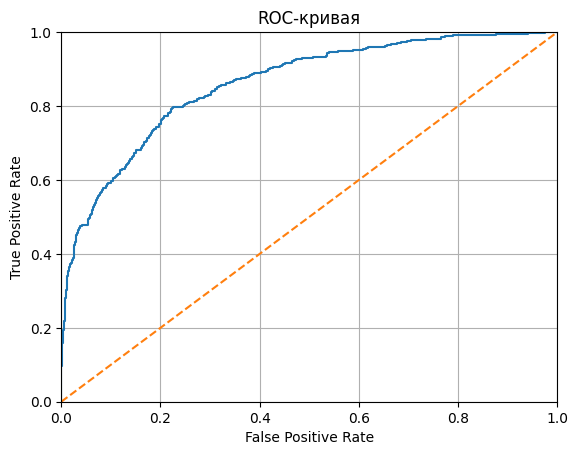

In [21]:
prob_one_valid = rfc.predict_proba(features_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, prob_one_valid)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая")
plt.grid()
plt.show()

In [22]:
roc_auc_score(target_valid, prob_one_valid)

0.8595532722222946

### CatBoost

Обучим модель CatBoost и найдем F1 и AUC-ROC. 

In [62]:
cbc = CatBoostClassifier(random_state=322)
cbc.fit(features_train, target_train)
predicted_valid = cbc.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)
prob_one_valid = cbc.predict_proba(features_valid)[:, 1]
roc_auc = roc_auc_score(target_valid, prob_one_valid)
print('F1 =', f1_valid.round(3), 'AUC-ROC=', roc_auc.round(3))

Learning rate set to 0.021257
0:	learn: 0.6756235	total: 140ms	remaining: 2m 20s
1:	learn: 0.6585459	total: 142ms	remaining: 1m 10s
2:	learn: 0.6432758	total: 144ms	remaining: 47.7s
3:	learn: 0.6289605	total: 145ms	remaining: 36.1s
4:	learn: 0.6148596	total: 147ms	remaining: 29.2s
5:	learn: 0.6012962	total: 148ms	remaining: 24.6s
6:	learn: 0.5896230	total: 150ms	remaining: 21.3s
7:	learn: 0.5778238	total: 151ms	remaining: 18.8s
8:	learn: 0.5660949	total: 153ms	remaining: 16.8s
9:	learn: 0.5553439	total: 155ms	remaining: 15.3s
10:	learn: 0.5454774	total: 156ms	remaining: 14s
11:	learn: 0.5370947	total: 158ms	remaining: 13s
12:	learn: 0.5279034	total: 159ms	remaining: 12.1s
13:	learn: 0.5183620	total: 161ms	remaining: 11.3s
14:	learn: 0.5108391	total: 162ms	remaining: 10.6s
15:	learn: 0.5037513	total: 164ms	remaining: 10.1s
16:	learn: 0.4959908	total: 165ms	remaining: 9.56s
17:	learn: 0.4896682	total: 167ms	remaining: 9.1s
18:	learn: 0.4832932	total: 168ms	remaining: 8.7s
19:	learn: 0.47

161:	learn: 0.3160286	total: 399ms	remaining: 2.06s
162:	learn: 0.3158610	total: 401ms	remaining: 2.06s
163:	learn: 0.3156416	total: 402ms	remaining: 2.05s
164:	learn: 0.3154811	total: 404ms	remaining: 2.04s
165:	learn: 0.3153025	total: 405ms	remaining: 2.04s
166:	learn: 0.3150063	total: 407ms	remaining: 2.03s
167:	learn: 0.3147587	total: 409ms	remaining: 2.02s
168:	learn: 0.3144890	total: 411ms	remaining: 2.02s
169:	learn: 0.3142249	total: 412ms	remaining: 2.01s
170:	learn: 0.3140675	total: 414ms	remaining: 2.01s
171:	learn: 0.3138564	total: 416ms	remaining: 2s
172:	learn: 0.3135980	total: 418ms	remaining: 2s
173:	learn: 0.3132945	total: 420ms	remaining: 1.99s
174:	learn: 0.3129783	total: 422ms	remaining: 1.99s
175:	learn: 0.3128147	total: 424ms	remaining: 1.98s
176:	learn: 0.3126280	total: 425ms	remaining: 1.98s
177:	learn: 0.3123357	total: 427ms	remaining: 1.97s
178:	learn: 0.3120990	total: 429ms	remaining: 1.97s
179:	learn: 0.3118581	total: 431ms	remaining: 1.96s
180:	learn: 0.3115

404:	learn: 0.2801360	total: 793ms	remaining: 1.17s
405:	learn: 0.2799378	total: 795ms	remaining: 1.16s
406:	learn: 0.2797635	total: 797ms	remaining: 1.16s
407:	learn: 0.2796823	total: 798ms	remaining: 1.16s
408:	learn: 0.2795549	total: 800ms	remaining: 1.16s
409:	learn: 0.2794079	total: 801ms	remaining: 1.15s
410:	learn: 0.2793387	total: 803ms	remaining: 1.15s
411:	learn: 0.2792091	total: 805ms	remaining: 1.15s
412:	learn: 0.2791267	total: 806ms	remaining: 1.15s
413:	learn: 0.2789319	total: 808ms	remaining: 1.14s
414:	learn: 0.2787814	total: 810ms	remaining: 1.14s
415:	learn: 0.2787071	total: 811ms	remaining: 1.14s
416:	learn: 0.2785558	total: 813ms	remaining: 1.14s
417:	learn: 0.2784680	total: 815ms	remaining: 1.13s
418:	learn: 0.2782870	total: 816ms	remaining: 1.13s
419:	learn: 0.2781831	total: 818ms	remaining: 1.13s
420:	learn: 0.2780308	total: 820ms	remaining: 1.13s
421:	learn: 0.2779275	total: 822ms	remaining: 1.13s
422:	learn: 0.2777973	total: 824ms	remaining: 1.12s
423:	learn: 

627:	learn: 0.2529678	total: 1.19s	remaining: 702ms
628:	learn: 0.2528976	total: 1.19s	remaining: 700ms
629:	learn: 0.2527662	total: 1.19s	remaining: 698ms
630:	learn: 0.2526509	total: 1.19s	remaining: 696ms
631:	learn: 0.2525491	total: 1.19s	remaining: 694ms
632:	learn: 0.2524308	total: 1.19s	remaining: 692ms
633:	learn: 0.2523541	total: 1.2s	remaining: 690ms
634:	learn: 0.2522764	total: 1.2s	remaining: 688ms
635:	learn: 0.2521614	total: 1.2s	remaining: 686ms
636:	learn: 0.2520548	total: 1.2s	remaining: 684ms
637:	learn: 0.2519728	total: 1.2s	remaining: 682ms
638:	learn: 0.2519125	total: 1.2s	remaining: 680ms
639:	learn: 0.2517898	total: 1.21s	remaining: 678ms
640:	learn: 0.2517074	total: 1.21s	remaining: 677ms
641:	learn: 0.2515414	total: 1.21s	remaining: 675ms
642:	learn: 0.2514116	total: 1.21s	remaining: 673ms
643:	learn: 0.2513073	total: 1.21s	remaining: 671ms
644:	learn: 0.2512199	total: 1.22s	remaining: 669ms
645:	learn: 0.2510926	total: 1.22s	remaining: 667ms
646:	learn: 0.2510

850:	learn: 0.2305602	total: 1.58s	remaining: 276ms
851:	learn: 0.2304681	total: 1.58s	remaining: 274ms
852:	learn: 0.2303729	total: 1.58s	remaining: 272ms
853:	learn: 0.2302938	total: 1.58s	remaining: 271ms
854:	learn: 0.2301628	total: 1.58s	remaining: 269ms
855:	learn: 0.2300919	total: 1.59s	remaining: 267ms
856:	learn: 0.2299626	total: 1.59s	remaining: 265ms
857:	learn: 0.2298354	total: 1.59s	remaining: 263ms
858:	learn: 0.2297999	total: 1.59s	remaining: 261ms
859:	learn: 0.2296576	total: 1.59s	remaining: 260ms
860:	learn: 0.2295550	total: 1.6s	remaining: 258ms
861:	learn: 0.2294980	total: 1.6s	remaining: 256ms
862:	learn: 0.2293904	total: 1.6s	remaining: 254ms
863:	learn: 0.2292803	total: 1.6s	remaining: 252ms
864:	learn: 0.2291851	total: 1.6s	remaining: 250ms
865:	learn: 0.2291017	total: 1.61s	remaining: 249ms
866:	learn: 0.2290289	total: 1.61s	remaining: 247ms
867:	learn: 0.2289301	total: 1.61s	remaining: 245ms
868:	learn: 0.2288398	total: 1.61s	remaining: 243ms
869:	learn: 0.228

CatBoost оказался немного лучше случайного леса. F1=0,598, AUC-ROC=0,862.

### Дерево решений

Применим optuna для нахождения лучших гиперпараметров.

In [24]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    dtc = DecisionTreeClassifier(max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    criterion=criterion,
                                    random_state=42)

    dtc.fit(features_train, target_train)

    predicted_valid = dtc.predict(features_valid)

    f1 = f1_score(target_valid, predicted_valid)

    return f1

In [25]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=300)

print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:07:17,352] A new study created in memory with name: no-name-a065b083-3a62-4832-abec-9ae5f639b339
[I 2023-03-15 19:07:17,376] Trial 0 finished with value: 0.546583850931677 and parameters: {'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 0 with value: 0.546583850931677.
[I 2023-03-15 19:07:17,396] Trial 1 finished with value: 0.5598705501618123 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5598705501618123.
[I 2023-03-15 19:07:17,416] Trial 2 finished with value: 0.5403111739745403 and parameters: {'max_depth': 27, 'min_samples_split': 22, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 1 with value: 0.5598705501618123.
[I 2023-03-15 19:07:17,440] Trial 3 finished with value: 0.5238828967642527 and parameters: {'max_depth': 24, 'min_samples_split': 16, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 1

[I 2023-03-15 19:07:18,294] Trial 34 finished with value: 0.5484848484848486 and parameters: {'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 14, 'criterion': 'entropy'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:18,322] Trial 35 finished with value: 0.5751824817518248 and parameters: {'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 15, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:18,352] Trial 36 finished with value: 0.5562130177514794 and parameters: {'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 11, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:18,385] Trial 37 finished with value: 0.5573770491803278 and parameters: {'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 21, 'criterion': 'entropy'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:18,414] Trial 38 finished with value: 0.5820433436532507 a

[I 2023-03-15 19:07:19,306] Trial 68 finished with value: 0.5705426356589148 and parameters: {'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 20, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:19,337] Trial 69 finished with value: 0.571875 and parameters: {'max_depth': 23, 'min_samples_split': 12, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:19,367] Trial 70 finished with value: 0.5532544378698224 and parameters: {'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 13, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:19,398] Trial 71 finished with value: 0.5820433436532507 and parameters: {'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:19,427] Trial 72 finished with value: 0.5820433436532507 and parameters:

[I 2023-03-15 19:07:20,354] Trial 102 finished with value: 0.5705426356589148 and parameters: {'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 20, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:20,386] Trial 103 finished with value: 0.5731895223420647 and parameters: {'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:20,417] Trial 104 finished with value: 0.5820433436532507 and parameters: {'max_depth': 27, 'min_samples_split': 9, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:20,449] Trial 105 finished with value: 0.565625 and parameters: {'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 21, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:20,482] Trial 106 finished with value: 0.535211267605634 and parameter

[I 2023-03-15 19:07:21,448] Trial 136 finished with value: 0.573208722741433 and parameters: {'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 19, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:21,480] Trial 137 finished with value: 0.5731895223420647 and parameters: {'max_depth': 28, 'min_samples_split': 13, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:21,511] Trial 138 finished with value: 0.5820433436532507 and parameters: {'max_depth': 27, 'min_samples_split': 9, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:21,547] Trial 139 finished with value: 0.549520766773163 and parameters: {'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 19, 'criterion': 'entropy'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:21,578] Trial 140 finished with value: 0.5705426356589148 

[I 2023-03-15 19:07:22,547] Trial 170 finished with value: 0.571875 and parameters: {'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:22,579] Trial 171 finished with value: 0.5820433436532507 and parameters: {'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:22,613] Trial 172 finished with value: 0.573208722741433 and parameters: {'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 19, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:22,645] Trial 173 finished with value: 0.5820433436532507 and parameters: {'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:22,678] Trial 174 finished with value: 0.5731895223420647 and paramete

[I 2023-03-15 19:07:23,701] Trial 204 finished with value: 0.5731895223420647 and parameters: {'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:23,735] Trial 205 finished with value: 0.5820433436532507 and parameters: {'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:23,770] Trial 206 finished with value: 0.573208722741433 and parameters: {'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 19, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:23,804] Trial 207 finished with value: 0.571875 and parameters: {'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:23,838] Trial 208 finished with value: 0.5820433436532507 and parameter

[I 2023-03-15 19:07:24,888] Trial 238 finished with value: 0.5820433436532507 and parameters: {'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:24,923] Trial 239 finished with value: 0.5731895223420647 and parameters: {'max_depth': 27, 'min_samples_split': 17, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:24,958] Trial 240 finished with value: 0.5820433436532507 and parameters: {'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:24,996] Trial 241 finished with value: 0.5820433436532507 and parameters: {'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:25,032] Trial 242 finished with value: 0.5820433436532507 

[I 2023-03-15 19:07:26,115] Trial 272 finished with value: 0.5736925515055468 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:26,155] Trial 273 finished with value: 0.5531250000000001 and parameters: {'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 17, 'criterion': 'entropy'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:26,193] Trial 274 finished with value: 0.573208722741433 and parameters: {'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 19, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:26,230] Trial 275 finished with value: 0.5820433436532507 and parameters: {'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 9 with value: 0.5828025477707006.
[I 2023-03-15 19:07:26,267] Trial 276 finished with value: 0.5820433436532507 

Best trial:
  Score: 0.583
  Params: 
    max_depth: 7
    min_samples_split: 8
    min_samples_leaf: 18
    criterion: gini


In [26]:
dtc = DecisionTreeClassifier(max_depth=7,
                                   min_samples_split=8,
                                   min_samples_leaf=18,
                                   criterion='gini',
                                   random_state=322)
dtc.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=18, min_samples_split=8,
                       random_state=322)

In [27]:
prob_one_valid = dtc.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, prob_one_valid).round(3)

0.839

Наиболее точной проявила себя молель дерева решений с: 
- max_depth: 7
- min_samples_split: 8
- min_samples_leaf: 18
- criterion: gini

Результаты CatBoost оказались наилучшими, F1=0,598 и AUC-ROC=0,862.

## Борьба с дисбалансом

Применим различные методы борьбы с дисбалансом.

### Взвешивание классов

#### Случайный лес

Обучим модели с перебором гиперпараметров и сделаем веса классов сбалансированными с помощью аргумента `class_weight`.

In [28]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 20, 150)
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   class_weight='balanced',
                                   random_state=322)

    rfc.fit(features_train, target_train)

    predicted_valid = rfc.predict(features_valid)

    f1 = f1_score(predicted_valid, target_valid)
    return f1

In [29]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=200)

print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:08:37,179] A new study created in memory with name: no-name-c3532cdc-94b5-4ab4-85a9-a098d8e51fe9
[I 2023-03-15 19:08:37,330] Trial 0 finished with value: 0.5939226519337016 and parameters: {'n_estimators': 38, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.5939226519337016.
[I 2023-03-15 19:08:37,779] Trial 1 finished with value: 0.5982404692082112 and parameters: {'n_estimators': 97, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5982404692082112.
[I 2023-03-15 19:08:38,290] Trial 2 finished with value: 0.6076923076923076 and parameters: {'n_estimators': 116, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 2 with value: 0.6076923076923076.
[I 2023-03-15 19:08:38,894] Trial 3 finished with value: 0.5954887218045113 and parameters: {'n_estimators': 127, 'max_depth': 16, 'min_sa

[I 2023-03-15 19:08:51,656] Trial 31 finished with value: 0.6146458583433374 and parameters: {'n_estimators': 107, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I 2023-03-15 19:08:52,005] Trial 32 finished with value: 0.6097271648873073 and parameters: {'n_estimators': 97, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I 2023-03-15 19:08:52,328] Trial 33 finished with value: 0.6183574879227054 and parameters: {'n_estimators': 88, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I 2023-03-15 19:08:52,648] Trial 34 finished with value: 0.6112412177985949 and parameters: {'n_estimators': 89, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I

[I 2023-03-15 19:09:01,250] Trial 63 finished with value: 0.6096131301289566 and parameters: {'n_estimators': 86, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I 2023-03-15 19:09:01,601] Trial 64 finished with value: 0.6168674698795181 and parameters: {'n_estimators': 96, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I 2023-03-15 19:09:01,954] Trial 65 finished with value: 0.6115702479338843 and parameters: {'n_estimators': 97, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I 2023-03-15 19:09:02,245] Trial 66 finished with value: 0.6109785202863961 and parameters: {'n_estimators': 79, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 30 with value: 0.6196172248803827.
[I 

[I 2023-03-15 19:09:14,714] Trial 95 finished with value: 0.6225165562913907 and parameters: {'n_estimators': 117, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:15,172] Trial 96 finished with value: 0.6188579017264275 and parameters: {'n_estimators': 118, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:15,603] Trial 97 finished with value: 0.6096938775510204 and parameters: {'n_estimators': 114, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:16,122] Trial 98 finished with value: 0.5945945945945946 and parameters: {'n_estimators': 107, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 75 with value: 0.625000000000000

[I 2023-03-15 19:09:29,762] Trial 127 finished with value: 0.5961251862891207 and parameters: {'n_estimators': 114, 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:30,180] Trial 128 finished with value: 0.5850914205344585 and parameters: {'n_estimators': 103, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:30,391] Trial 129 finished with value: 0.582441113490364 and parameters: {'n_estimators': 108, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:30,860] Trial 130 finished with value: 0.623342175066313 and parameters: {'n_estimators': 120, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.

[I 2023-03-15 19:09:43,854] Trial 159 finished with value: 0.608695652173913 and parameters: {'n_estimators': 121, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:44,350] Trial 160 finished with value: 0.6180371352785146 and parameters: {'n_estimators': 125, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:44,819] Trial 161 finished with value: 0.6231691078561918 and parameters: {'n_estimators': 114, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:45,300] Trial 162 finished with value: 0.623342175066313 and parameters: {'n_estimators': 120, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001

[I 2023-03-15 19:09:59,233] Trial 191 finished with value: 0.623342175066313 and parameters: {'n_estimators': 117, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:09:59,739] Trial 192 finished with value: 0.6180371352785146 and parameters: {'n_estimators': 125, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:10:00,227] Trial 193 finished with value: 0.6225165562913907 and parameters: {'n_estimators': 119, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001.
[I 2023-03-15 19:10:00,710] Trial 194 finished with value: 0.623342175066313 and parameters: {'n_estimators': 121, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 75 with value: 0.6250000000000001

Best trial:
  Score: 0.625
  Params: 
    n_estimators: 112
    max_depth: 19
    min_samples_split: 6
    min_samples_leaf: 4
    criterion: gini


In [30]:
rfc_cl_w = RandomForestClassifier(n_estimators=112,
                                   max_depth=19,
                                   min_samples_split=6,
                                   min_samples_leaf=4,
                                   criterion='gini',
                                   class_weight='balanced',
                                   random_state=322)
rfc_cl_w.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=19,
                       min_samples_leaf=4, min_samples_split=6,
                       n_estimators=112, random_state=322)

In [31]:
prob_one_valid = rfc_cl_w.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, prob_one_valid).round(3)

0.861

F1 равна 0,625, а AUC-ROC - 0,861. Эти показатели лучше чем у модели без учета дисбаланса.

#### CatBoost

Обучим модель CatBoost со сбалансированным весом классов.

In [64]:
cbc_cl_w = CatBoostClassifier(auto_class_weights="Balanced",
                         random_state=322)
cbc_cl_w.fit(features_train, target_train)
predicted_valid = cbc_cl_w.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)
prob_one_valid = cbc_cl_w.predict_proba(features_valid)[:, 1]
roc_auc = roc_auc_score(target_valid, prob_one_valid)
print('F1 =', f1_valid.round(3), 'AUC-ROC=', roc_auc.round(3))

Learning rate set to 0.021257
0:	learn: 0.6828764	total: 1.99ms	remaining: 1.99s
1:	learn: 0.6728673	total: 3.86ms	remaining: 1.93s
2:	learn: 0.6646738	total: 6.22ms	remaining: 2.07s
3:	learn: 0.6577469	total: 8.33ms	remaining: 2.07s
4:	learn: 0.6486953	total: 10.5ms	remaining: 2.09s
5:	learn: 0.6399726	total: 12.6ms	remaining: 2.09s
6:	learn: 0.6330122	total: 14.4ms	remaining: 2.05s
7:	learn: 0.6256236	total: 16.5ms	remaining: 2.05s
8:	learn: 0.6176381	total: 18.6ms	remaining: 2.05s
9:	learn: 0.6113616	total: 21ms	remaining: 2.08s
10:	learn: 0.6048369	total: 23ms	remaining: 2.07s
11:	learn: 0.6002579	total: 25ms	remaining: 2.06s
12:	learn: 0.5949636	total: 26.8ms	remaining: 2.03s
13:	learn: 0.5893297	total: 28.7ms	remaining: 2.02s
14:	learn: 0.5852258	total: 30.5ms	remaining: 2s
15:	learn: 0.5813245	total: 32.3ms	remaining: 1.99s
16:	learn: 0.5770544	total: 34.4ms	remaining: 1.99s
17:	learn: 0.5738288	total: 36.5ms	remaining: 1.99s
18:	learn: 0.5683669	total: 38.7ms	remaining: 2s
19:	

227:	learn: 0.4086430	total: 396ms	remaining: 1.34s
228:	learn: 0.4083729	total: 398ms	remaining: 1.34s
229:	learn: 0.4082691	total: 400ms	remaining: 1.34s
230:	learn: 0.4079998	total: 402ms	remaining: 1.34s
231:	learn: 0.4078075	total: 404ms	remaining: 1.34s
232:	learn: 0.4075543	total: 406ms	remaining: 1.33s
233:	learn: 0.4074758	total: 408ms	remaining: 1.33s
234:	learn: 0.4072797	total: 409ms	remaining: 1.33s
235:	learn: 0.4071417	total: 411ms	remaining: 1.33s
236:	learn: 0.4068947	total: 413ms	remaining: 1.33s
237:	learn: 0.4065148	total: 415ms	remaining: 1.33s
238:	learn: 0.4062673	total: 417ms	remaining: 1.33s
239:	learn: 0.4060880	total: 419ms	remaining: 1.33s
240:	learn: 0.4058893	total: 421ms	remaining: 1.32s
241:	learn: 0.4057194	total: 423ms	remaining: 1.32s
242:	learn: 0.4055132	total: 424ms	remaining: 1.32s
243:	learn: 0.4053497	total: 426ms	remaining: 1.32s
244:	learn: 0.4052103	total: 428ms	remaining: 1.32s
245:	learn: 0.4049952	total: 429ms	remaining: 1.31s
246:	learn: 

447:	learn: 0.3650928	total: 801ms	remaining: 987ms
448:	learn: 0.3649132	total: 803ms	remaining: 985ms
449:	learn: 0.3646386	total: 805ms	remaining: 983ms
450:	learn: 0.3644640	total: 806ms	remaining: 981ms
451:	learn: 0.3642872	total: 808ms	remaining: 980ms
452:	learn: 0.3640913	total: 810ms	remaining: 978ms
453:	learn: 0.3639018	total: 812ms	remaining: 976ms
454:	learn: 0.3636223	total: 814ms	remaining: 975ms
455:	learn: 0.3634288	total: 816ms	remaining: 974ms
456:	learn: 0.3632552	total: 821ms	remaining: 975ms
457:	learn: 0.3630274	total: 823ms	remaining: 974ms
458:	learn: 0.3627993	total: 825ms	remaining: 973ms
459:	learn: 0.3626085	total: 827ms	remaining: 971ms
460:	learn: 0.3623537	total: 829ms	remaining: 970ms
461:	learn: 0.3622264	total: 831ms	remaining: 968ms
462:	learn: 0.3619660	total: 833ms	remaining: 966ms
463:	learn: 0.3617126	total: 835ms	remaining: 964ms
464:	learn: 0.3615416	total: 837ms	remaining: 963ms
465:	learn: 0.3613699	total: 839ms	remaining: 961ms
466:	learn: 

662:	learn: 0.3266039	total: 1.19s	remaining: 606ms
663:	learn: 0.3263903	total: 1.19s	remaining: 604ms
664:	learn: 0.3262494	total: 1.2s	remaining: 602ms
665:	learn: 0.3261216	total: 1.2s	remaining: 600ms
666:	learn: 0.3259097	total: 1.2s	remaining: 598ms
667:	learn: 0.3258123	total: 1.2s	remaining: 597ms
668:	learn: 0.3256476	total: 1.2s	remaining: 595ms
669:	learn: 0.3255126	total: 1.2s	remaining: 593ms
670:	learn: 0.3252936	total: 1.21s	remaining: 591ms
671:	learn: 0.3250947	total: 1.21s	remaining: 589ms
672:	learn: 0.3249067	total: 1.21s	remaining: 587ms
673:	learn: 0.3246861	total: 1.21s	remaining: 586ms
674:	learn: 0.3244845	total: 1.21s	remaining: 584ms
675:	learn: 0.3243532	total: 1.21s	remaining: 582ms
676:	learn: 0.3241827	total: 1.22s	remaining: 580ms
677:	learn: 0.3239166	total: 1.22s	remaining: 579ms
678:	learn: 0.3237715	total: 1.22s	remaining: 577ms
679:	learn: 0.3235793	total: 1.22s	remaining: 575ms
680:	learn: 0.3235132	total: 1.22s	remaining: 573ms
681:	learn: 0.3234

891:	learn: 0.2931368	total: 1.59s	remaining: 192ms
892:	learn: 0.2930446	total: 1.59s	remaining: 190ms
893:	learn: 0.2929717	total: 1.59s	remaining: 189ms
894:	learn: 0.2927183	total: 1.59s	remaining: 187ms
895:	learn: 0.2926060	total: 1.59s	remaining: 185ms
896:	learn: 0.2924110	total: 1.59s	remaining: 183ms
897:	learn: 0.2922237	total: 1.6s	remaining: 181ms
898:	learn: 0.2921399	total: 1.6s	remaining: 180ms
899:	learn: 0.2920535	total: 1.6s	remaining: 178ms
900:	learn: 0.2919478	total: 1.6s	remaining: 176ms
901:	learn: 0.2917735	total: 1.6s	remaining: 174ms
902:	learn: 0.2916087	total: 1.6s	remaining: 172ms
903:	learn: 0.2914133	total: 1.61s	remaining: 171ms
904:	learn: 0.2911783	total: 1.61s	remaining: 169ms
905:	learn: 0.2909319	total: 1.61s	remaining: 167ms
906:	learn: 0.2907816	total: 1.61s	remaining: 165ms
907:	learn: 0.2906491	total: 1.61s	remaining: 164ms
908:	learn: 0.2905341	total: 1.62s	remaining: 162ms
909:	learn: 0.2903707	total: 1.62s	remaining: 160ms
910:	learn: 0.2902

Результаты также улучшились, но хуже, чем у случайного леса.

#### Дерево решений

Проделаем то же самое для дерева решений.

In [33]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    dtc = DecisionTreeClassifier(max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    criterion=criterion,
                                    class_weight='balanced',
                                    random_state=322)

    dtc.fit(features_train, target_train)

    predicted_valid = dtc.predict(features_valid)

    f1 = f1_score(target_valid, predicted_valid)

    return f1

In [34]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=300)

print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:11:11,205] A new study created in memory with name: no-name-1de9b9f4-7a67-4821-b62b-d66dde2e4c83
[I 2023-03-15 19:11:11,224] Trial 0 finished with value: 0.5740932642487047 and parameters: {'max_depth': 17, 'min_samples_split': 27, 'min_samples_leaf': 28, 'criterion': 'gini'}. Best is trial 0 with value: 0.5740932642487047.
[I 2023-03-15 19:11:11,245] Trial 1 finished with value: 0.5650048875855328 and parameters: {'max_depth': 38, 'min_samples_split': 9, 'min_samples_leaf': 15, 'criterion': 'gini'}. Best is trial 0 with value: 0.5740932642487047.
[I 2023-03-15 19:11:11,267] Trial 2 finished with value: 0.5454545454545455 and parameters: {'max_depth': 39, 'min_samples_split': 10, 'min_samples_leaf': 19, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5740932642487047.
[I 2023-03-15 19:11:11,286] Trial 3 finished with value: 0.5688442211055276 and parameters: {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 23, 'criterion': 'gini'}. Best is trial 0 w

[I 2023-03-15 19:11:12,100] Trial 34 finished with value: 0.5714285714285714 and parameters: {'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 23, 'criterion': 'gini'}. Best is trial 0 with value: 0.5740932642487047.
[I 2023-03-15 19:11:12,131] Trial 35 finished with value: 0.570539419087137 and parameters: {'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 28, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5740932642487047.
[I 2023-03-15 19:11:12,162] Trial 36 finished with value: 0.5280172413793103 and parameters: {'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 0 with value: 0.5740932642487047.
[I 2023-03-15 19:11:12,191] Trial 37 finished with value: 0.572289156626506 and parameters: {'max_depth': 21, 'min_samples_split': 27, 'min_samples_leaf': 20, 'criterion': 'gini'}. Best is trial 0 with value: 0.5740932642487047.
[I 2023-03-15 19:11:12,223] Trial 38 finished with value: 0.5708333333333334 and 

[I 2023-03-15 19:11:13,061] Trial 68 finished with value: 0.5612968591691996 and parameters: {'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:13,088] Trial 69 finished with value: 0.5626204238921001 and parameters: {'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:13,118] Trial 70 finished with value: 0.5677546983184966 and parameters: {'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 15, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:13,146] Trial 71 finished with value: 0.5737874097007225 and parameters: {'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:13,177] Trial 72 finished with value: 0.5781409601634321 and 

[I 2023-03-15 19:11:14,039] Trial 102 finished with value: 0.5660749506903353 and parameters: {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 14, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:14,067] Trial 103 finished with value: 0.5662535748331744 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 15, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:14,098] Trial 104 finished with value: 0.5705705705705706 and parameters: {'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 21, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:14,127] Trial 105 finished with value: 0.5752855659397715 and parameters: {'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 13, 'criterion': 'gini'}. Best is trial 42 with value: 0.5820433436532508.
[I 2023-03-15 19:11:14,162] Trial 106 finished with value: 0.5475956820412169 

[I 2023-03-15 19:11:15,083] Trial 136 finished with value: 0.566990291262136 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:15,108] Trial 137 finished with value: 0.5350795135640786 and parameters: {'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:15,140] Trial 138 finished with value: 0.5527638190954774 and parameters: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:15,173] Trial 139 finished with value: 0.563691073219659 and parameters: {'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 15, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:15,206] Trial 140 finished with value: 0.5673175745118192

[I 2023-03-15 19:11:16,161] Trial 170 finished with value: 0.5555555555555556 and parameters: {'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 13, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:16,193] Trial 171 finished with value: 0.5661914460285131 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 19, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:16,227] Trial 172 finished with value: 0.5870236869207003 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 20, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:16,259] Trial 173 finished with value: 0.5870236869207003 and parameters: {'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 20, 'criterion': 'gini'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:16,291] Trial 174 finished with value: 0.58702368692

[I 2023-03-15 19:11:17,336] Trial 204 finished with value: 0.5686839577329491 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 25, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:17,373] Trial 205 finished with value: 0.5881126173096977 and parameters: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 23, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:17,407] Trial 206 finished with value: 0.5686839577329491 and parameters: {'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 23, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:17,445] Trial 207 finished with value: 0.5881126173096977 and parameters: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 24, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:17,476] Trial 208 finished with value: 0.551

[I 2023-03-15 19:11:18,568] Trial 238 finished with value: 0.5749235474006116 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 25, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:18,605] Trial 239 finished with value: 0.5851619644723093 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 27, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:18,639] Trial 240 finished with value: 0.5677799607072691 and parameters: {'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 24, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:18,677] Trial 241 finished with value: 0.5881126173096977 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 23, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:18,716] Trial 242 finished with value: 0.588

[I 2023-03-15 19:11:19,871] Trial 272 finished with value: 0.5686839577329491 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 26, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:19,909] Trial 273 finished with value: 0.5881126173096977 and parameters: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 24, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:19,950] Trial 274 finished with value: 0.5673469387755101 and parameters: {'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 23, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:19,990] Trial 275 finished with value: 0.5714285714285714 and parameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 22, 'criterion': 'entropy'}. Best is trial 124 with value: 0.5888538380651945.
[I 2023-03-15 19:11:20,027] Trial 276 finished with value: 0.56

Best trial:
  Score: 0.589
  Params: 
    max_depth: 9
    min_samples_split: 11
    min_samples_leaf: 20
    criterion: gini


In [35]:
dtc_cl_w = DecisionTreeClassifier(max_depth=9,
                                   min_samples_split=11,
                                   min_samples_leaf=20,
                                   criterion='entropy',
                                   class_weight='balanced',
                                   random_state=322)
dtc_cl_w.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, min_samples_leaf=20, min_samples_split=11,
                       random_state=322)

In [36]:
prob_one_valid =dtc_cl_w.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, prob_one_valid).round(3)

0.833

Для дерева решений результат практически не изменился.

### Upsampling

Применим метод upsampling. Сначала разделим обучающую выборку по классам, скопируем меньший класс несколько раз, снова объединим эти данные и перемешаем.

In [37]:
features_train.head()

,CreditScore,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.393274,1,0,0,1,0,0.684323,-0.689374,-1.214471,0.791149,0,1,0.103521
1,-0.094186,0,1,0,1,0,0.116212,0.693685,-1.214471,-0.920444,1,0,0.485720
2,1.140021,0,0,1,0,1,-0.451898,0.347920,0.734066,0.791149,1,1,-0.684914
3,2.073455,0,0,1,1,0,0.021527,0.002155,0.624644,-0.920444,1,0,0.013339
4,-0.903162,1,0,0,0,1,1.725858,0.347920,-1.214471,0.791149,1,1,-1.031369


In [38]:
features_zeros = features_train[target == 0]
features_ones = features_train[target == 1]
target_zeros = target_train[target == 0]
target_ones = target_train[target == 1]

C:\Users\banan\AppData\Local\Temp\ipykernel_8484\3728280255.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_zeros = features_train[target == 0]
C:\Users\banan\AppData\Local\Temp\ipykernel_8484\3728280255.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_ones = features_train[target == 1]


In [39]:
features_upsampled = pd.concat([features_zeros] + [features_ones] * 4)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 4)
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=322)


#### Случайный лес

In [40]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 20, 150)
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   random_state=322)

    rfc.fit(features_upsampled, target_upsampled)

    predicted_valid = rfc.predict(features_valid)

    f1 = f1_score(predicted_valid, target_valid)
    return f1

In [41]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=200)

print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:12:29,184] A new study created in memory with name: no-name-8aa2ece9-9c40-4699-ae2d-6af9bdcf7f9e
[I 2023-03-15 19:12:29,839] Trial 0 finished with value: 0.5583756345177666 and parameters: {'n_estimators': 100, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5583756345177666.
[I 2023-03-15 19:12:30,093] Trial 1 finished with value: 0.5333333333333332 and parameters: {'n_estimators': 46, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.5583756345177666.
[I 2023-03-15 19:12:30,275] Trial 2 finished with value: 0.5391304347826087 and parameters: {'n_estimators': 33, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5583756345177666.
[I 2023-03-15 19:12:30,859] Trial 3 finished with value: 0.5432937181663837 and parameters: {'n_estimators': 107, 'max_depth': 15, 'min_sa

[I 2023-03-15 19:12:51,437] Trial 31 finished with value: 0.5733333333333333 and parameters: {'n_estimators': 141, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:12:52,399] Trial 32 finished with value: 0.5671140939597314 and parameters: {'n_estimators': 139, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:12:53,321] Trial 33 finished with value: 0.5426621160409556 and parameters: {'n_estimators': 138, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:12:54,016] Trial 34 finished with value: 0.5516074450084603 and parameters: {'n_estimators': 123, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 28 with value: 0.573333333

[I 2023-03-15 19:13:17,309] Trial 62 finished with value: 0.5605306799336649 and parameters: {'n_estimators': 150, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:13:18,262] Trial 63 finished with value: 0.5681063122923588 and parameters: {'n_estimators': 137, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:13:19,185] Trial 64 finished with value: 0.5466893039049237 and parameters: {'n_estimators': 138, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:13:20,053] Trial 65 finished with value: 0.5628140703517588 and parameters: {'n_estimators': 125, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.573333

[I 2023-03-15 19:13:44,253] Trial 93 finished with value: 0.5690515806988352 and parameters: {'n_estimators': 144, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:13:45,299] Trial 94 finished with value: 0.5476190476190477 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:13:45,929] Trial 95 finished with value: 0.559463986599665 and parameters: {'n_estimators': 89, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.5733333333333333.
[I 2023-03-15 19:13:46,927] Trial 96 finished with value: 0.5714285714285714 and parameters: {'n_estimators': 143, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 28 with value: 0.57333333

[I 2023-03-15 19:14:12,780] Trial 124 finished with value: 0.5661641541038527 and parameters: {'n_estimators': 140, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:14:13,659] Trial 125 finished with value: 0.5540540540540541 and parameters: {'n_estimators': 137, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:14:14,656] Trial 126 finished with value: 0.5666666666666667 and parameters: {'n_estimators': 142, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:14:15,615] Trial 127 finished with value: 0.5417376490630323 and parameters: {'n_estimators': 139, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 103 with value: 

[I 2023-03-15 19:14:42,031] Trial 155 finished with value: 0.5519591141396933 and parameters: {'n_estimators': 108, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:14:42,967] Trial 156 finished with value: 0.5680672268907564 and parameters: {'n_estimators': 134, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:14:43,956] Trial 157 finished with value: 0.5423728813559322 and parameters: {'n_estimators': 147, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:14:44,963] Trial 158 finished with value: 0.5737976782752902 and parameters: {'n_estimators': 143, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 

[I 2023-03-15 19:15:12,163] Trial 186 finished with value: 0.5628140703517588 and parameters: {'n_estimators': 150, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:15:13,114] Trial 187 finished with value: 0.5647058823529413 and parameters: {'n_estimators': 136, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:15:14,124] Trial 188 finished with value: 0.5676126878130217 and parameters: {'n_estimators': 142, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 0.5737976782752902.
[I 2023-03-15 19:15:15,023] Trial 189 finished with value: 0.5491525423728814 and parameters: {'n_estimators': 132, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 103 with value: 

Best trial:
  Score: 0.574
  Params: 
    n_estimators: 143
    max_depth: 30
    min_samples_split: 2
    min_samples_leaf: 1
    criterion: entropy


In [42]:
rfc_up = RandomForestClassifier(n_estimators=143,
                                   max_depth=30,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   criterion='entropy',
                                   random_state=322)
rfc_up.fit(features_upsampled, target_upsampled)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=143,
                       random_state=322)

In [43]:
prob_one_valid = rfc_up.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, prob_one_valid)

0.8524710480089859

#### CatBoost

In [65]:
cbc_up = CatBoostClassifier(random_state=322)
cbc_up.fit(features_upsampled, target_upsampled)
predicted_valid = cbc_up.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)
prob_one_valid = cbc_up.predict_proba(features_valid)[:, 1]
roc_auc = roc_auc_score(target_valid, prob_one_valid)
print('F1 =', f1_valid.round(3), 'AUC-ROC=', roc_auc.round(3))

Learning rate set to 0.026127
0:	learn: 0.6699049	total: 8.52ms	remaining: 8.51s
1:	learn: 0.6485033	total: 11.2ms	remaining: 5.6s
2:	learn: 0.6291266	total: 13.7ms	remaining: 4.57s
3:	learn: 0.6116783	total: 16.1ms	remaining: 4.01s
4:	learn: 0.5928754	total: 19ms	remaining: 3.79s
5:	learn: 0.5798186	total: 21.3ms	remaining: 3.54s
6:	learn: 0.5652268	total: 23.5ms	remaining: 3.33s
7:	learn: 0.5511597	total: 25.6ms	remaining: 3.18s
8:	learn: 0.5383528	total: 27.7ms	remaining: 3.06s
9:	learn: 0.5251958	total: 29.8ms	remaining: 2.95s
10:	learn: 0.5132096	total: 31.9ms	remaining: 2.87s
11:	learn: 0.5041745	total: 34.1ms	remaining: 2.81s
12:	learn: 0.4937482	total: 36.3ms	remaining: 2.76s
13:	learn: 0.4843406	total: 38.7ms	remaining: 2.72s
14:	learn: 0.4766460	total: 40.9ms	remaining: 2.69s
15:	learn: 0.4680131	total: 43.1ms	remaining: 2.65s
16:	learn: 0.4599664	total: 45.2ms	remaining: 2.61s
17:	learn: 0.4521105	total: 47.3ms	remaining: 2.58s
18:	learn: 0.4446713	total: 49.4ms	remaining: 2

180:	learn: 0.2852704	total: 411ms	remaining: 1.86s
181:	learn: 0.2847430	total: 413ms	remaining: 1.86s
182:	learn: 0.2844250	total: 415ms	remaining: 1.85s
183:	learn: 0.2841550	total: 418ms	remaining: 1.85s
184:	learn: 0.2838762	total: 420ms	remaining: 1.85s
185:	learn: 0.2836049	total: 422ms	remaining: 1.85s
186:	learn: 0.2833571	total: 425ms	remaining: 1.85s
187:	learn: 0.2830366	total: 428ms	remaining: 1.85s
188:	learn: 0.2827851	total: 430ms	remaining: 1.84s
189:	learn: 0.2825739	total: 433ms	remaining: 1.84s
190:	learn: 0.2823266	total: 435ms	remaining: 1.84s
191:	learn: 0.2819833	total: 437ms	remaining: 1.84s
192:	learn: 0.2817629	total: 440ms	remaining: 1.84s
193:	learn: 0.2815943	total: 442ms	remaining: 1.84s
194:	learn: 0.2813582	total: 445ms	remaining: 1.83s
195:	learn: 0.2810682	total: 447ms	remaining: 1.83s
196:	learn: 0.2808418	total: 449ms	remaining: 1.83s
197:	learn: 0.2806095	total: 451ms	remaining: 1.83s
198:	learn: 0.2803730	total: 453ms	remaining: 1.82s
199:	learn: 

358:	learn: 0.2469739	total: 807ms	remaining: 1.44s
359:	learn: 0.2467574	total: 809ms	remaining: 1.44s
360:	learn: 0.2466038	total: 811ms	remaining: 1.44s
361:	learn: 0.2463896	total: 814ms	remaining: 1.43s
362:	learn: 0.2462614	total: 816ms	remaining: 1.43s
363:	learn: 0.2461579	total: 818ms	remaining: 1.43s
364:	learn: 0.2459252	total: 821ms	remaining: 1.43s
365:	learn: 0.2457057	total: 823ms	remaining: 1.43s
366:	learn: 0.2455444	total: 825ms	remaining: 1.42s
367:	learn: 0.2453525	total: 828ms	remaining: 1.42s
368:	learn: 0.2451585	total: 830ms	remaining: 1.42s
369:	learn: 0.2449312	total: 832ms	remaining: 1.42s
370:	learn: 0.2447537	total: 834ms	remaining: 1.41s
371:	learn: 0.2446142	total: 837ms	remaining: 1.41s
372:	learn: 0.2444766	total: 839ms	remaining: 1.41s
373:	learn: 0.2443349	total: 841ms	remaining: 1.41s
374:	learn: 0.2440156	total: 843ms	remaining: 1.41s
375:	learn: 0.2438671	total: 845ms	remaining: 1.4s
376:	learn: 0.2436804	total: 847ms	remaining: 1.4s
377:	learn: 0.

534:	learn: 0.2164725	total: 1.2s	remaining: 1.04s
535:	learn: 0.2163138	total: 1.2s	remaining: 1.04s
536:	learn: 0.2160476	total: 1.21s	remaining: 1.04s
537:	learn: 0.2159189	total: 1.21s	remaining: 1.04s
538:	learn: 0.2157277	total: 1.21s	remaining: 1.03s
539:	learn: 0.2155243	total: 1.21s	remaining: 1.03s
540:	learn: 0.2154173	total: 1.21s	remaining: 1.03s
541:	learn: 0.2152610	total: 1.22s	remaining: 1.03s
542:	learn: 0.2151777	total: 1.22s	remaining: 1.02s
543:	learn: 0.2150531	total: 1.22s	remaining: 1.02s
544:	learn: 0.2148592	total: 1.22s	remaining: 1.02s
545:	learn: 0.2147096	total: 1.23s	remaining: 1.02s
546:	learn: 0.2145568	total: 1.23s	remaining: 1.02s
547:	learn: 0.2144330	total: 1.23s	remaining: 1.01s
548:	learn: 0.2143421	total: 1.23s	remaining: 1.01s
549:	learn: 0.2142003	total: 1.23s	remaining: 1.01s
550:	learn: 0.2140023	total: 1.24s	remaining: 1.01s
551:	learn: 0.2138809	total: 1.24s	remaining: 1s
552:	learn: 0.2137001	total: 1.24s	remaining: 1s
553:	learn: 0.213527

712:	learn: 0.1936931	total: 1.6s	remaining: 644ms
713:	learn: 0.1935994	total: 1.6s	remaining: 641ms
714:	learn: 0.1934529	total: 1.6s	remaining: 639ms
715:	learn: 0.1933100	total: 1.6s	remaining: 637ms
716:	learn: 0.1931356	total: 1.61s	remaining: 635ms
717:	learn: 0.1930208	total: 1.61s	remaining: 632ms
718:	learn: 0.1929423	total: 1.61s	remaining: 630ms
719:	learn: 0.1928052	total: 1.61s	remaining: 628ms
720:	learn: 0.1926345	total: 1.62s	remaining: 626ms
721:	learn: 0.1925501	total: 1.62s	remaining: 624ms
722:	learn: 0.1924882	total: 1.62s	remaining: 622ms
723:	learn: 0.1922964	total: 1.63s	remaining: 619ms
724:	learn: 0.1922249	total: 1.63s	remaining: 617ms
725:	learn: 0.1921029	total: 1.63s	remaining: 615ms
726:	learn: 0.1920230	total: 1.63s	remaining: 613ms
727:	learn: 0.1919421	total: 1.64s	remaining: 611ms
728:	learn: 0.1918539	total: 1.64s	remaining: 609ms
729:	learn: 0.1917463	total: 1.64s	remaining: 606ms
730:	learn: 0.1916075	total: 1.64s	remaining: 604ms
731:	learn: 0.19

884:	learn: 0.1754327	total: 2s	remaining: 260ms
885:	learn: 0.1753358	total: 2s	remaining: 257ms
886:	learn: 0.1752306	total: 2s	remaining: 255ms
887:	learn: 0.1751374	total: 2s	remaining: 253ms
888:	learn: 0.1750595	total: 2.01s	remaining: 251ms
889:	learn: 0.1749486	total: 2.01s	remaining: 248ms
890:	learn: 0.1748723	total: 2.01s	remaining: 246ms
891:	learn: 0.1748086	total: 2.01s	remaining: 244ms
892:	learn: 0.1746960	total: 2.02s	remaining: 242ms
893:	learn: 0.1746242	total: 2.02s	remaining: 239ms
894:	learn: 0.1744745	total: 2.02s	remaining: 237ms
895:	learn: 0.1743578	total: 2.02s	remaining: 235ms
896:	learn: 0.1742524	total: 2.02s	remaining: 233ms
897:	learn: 0.1741916	total: 2.03s	remaining: 230ms
898:	learn: 0.1741276	total: 2.03s	remaining: 228ms
899:	learn: 0.1740484	total: 2.03s	remaining: 226ms
900:	learn: 0.1739452	total: 2.03s	remaining: 223ms
901:	learn: 0.1738671	total: 2.04s	remaining: 221ms
902:	learn: 0.1737335	total: 2.04s	remaining: 219ms
903:	learn: 0.1736915	to

#### Дерево решений

In [45]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    dtc = DecisionTreeClassifier(max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    criterion=criterion,
                                    random_state=322)

    dtc.fit(features_upsampled, target_upsampled)

    predicted_valid = dtc.predict(features_valid)

    f1 = f1_score(target_valid, predicted_valid)

    return f1

In [46]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=200)

print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:16:03,915] A new study created in memory with name: no-name-a9a61e06-745b-44be-893a-d377f32a0ab1
[I 2023-03-15 19:16:03,948] Trial 0 finished with value: 0.5231689088191329 and parameters: {'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5231689088191329.
[I 2023-03-15 19:16:03,975] Trial 1 finished with value: 0.5629629629629629 and parameters: {'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 1 with value: 0.5629629629629629.
[I 2023-03-15 19:16:04,007] Trial 2 finished with value: 0.540381791483113 and parameters: {'max_depth': 31, 'min_samples_split': 22, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5629629629629629.
[I 2023-03-15 19:16:04,023] Trial 3 finished with value: 0.5125448028673836 and parameters: {'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 22, 'criterion': 'gini'}. Best is trial 1 w

[I 2023-03-15 19:16:05,186] Trial 34 finished with value: 0.5722983257229832 and parameters: {'max_depth': 21, 'min_samples_split': 10, 'min_samples_leaf': 17, 'criterion': 'entropy'}. Best is trial 29 with value: 0.5867895545314901.
[I 2023-03-15 19:16:05,225] Trial 35 finished with value: 0.5692307692307692 and parameters: {'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 17, 'criterion': 'entropy'}. Best is trial 29 with value: 0.5867895545314901.
[I 2023-03-15 19:16:05,266] Trial 36 finished with value: 0.56973293768546 and parameters: {'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 29 with value: 0.5867895545314901.
[I 2023-03-15 19:16:05,299] Trial 37 finished with value: 0.5773524720893142 and parameters: {'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 25, 'criterion': 'entropy'}. Best is trial 29 with value: 0.5867895545314901.
[I 2023-03-15 19:16:05,334] Trial 38 finished with value: 0.56964006

[I 2023-03-15 19:16:06,314] Trial 68 finished with value: 0.5772870662460569 and parameters: {'max_depth': 7, 'min_samples_split': 23, 'min_samples_leaf': 14, 'criterion': 'gini'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:06,353] Trial 69 finished with value: 0.5629629629629629 and parameters: {'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:06,388] Trial 70 finished with value: 0.5608974358974358 and parameters: {'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 27, 'criterion': 'gini'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:06,419] Trial 71 finished with value: 0.5304054054054054 and parameters: {'max_depth': 6, 'min_samples_split': 28, 'min_samples_leaf': 11, 'criterion': 'gini'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:06,452] Trial 72 finished with value: 0.5627009646302251 an

[I 2023-03-15 19:16:07,610] Trial 102 finished with value: 0.558641975308642 and parameters: {'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 20, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:07,646] Trial 103 finished with value: 0.5438898450946643 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 21, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:07,689] Trial 104 finished with value: 0.5757121439280359 and parameters: {'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:07,720] Trial 105 finished with value: 0.5107913669064749 and parameters: {'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 15, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:07,759] Trial 106 finished with value: 0.582930

[I 2023-03-15 19:16:08,941] Trial 136 finished with value: 0.5557251908396946 and parameters: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 20, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:08,979] Trial 137 finished with value: 0.5824 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 17, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:09,020] Trial 138 finished with value: 0.5840978593272171 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 13, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:09,054] Trial 139 finished with value: 0.5266903914590747 and parameters: {'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:09,100] Trial 140 finished with value: 0.5319465081723626 a

[I 2023-03-15 19:16:10,298] Trial 170 finished with value: 0.5736925515055468 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 14, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:10,340] Trial 171 finished with value: 0.5705614567526556 and parameters: {'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 18, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:10,381] Trial 172 finished with value: 0.5852895148669797 and parameters: {'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 19, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:10,427] Trial 173 finished with value: 0.5640243902439025 and parameters: {'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 19, 'criterion': 'entropy'}. Best is trial 45 with value: 0.5889763779527559.
[I 2023-03-15 19:16:10,468] Trial 174 finished with value: 0.58551

Best trial:
  Score: 0.589
  Params: 
    max_depth: 7
    min_samples_split: 20
    min_samples_leaf: 25
    criterion: gini


In [47]:
dtc_up = DecisionTreeClassifier(max_depth=7,
                                    min_samples_split=20,
                                    min_samples_leaf=25,
                                    criterion='gini',
                                    random_state=322)

dtc_up.fit(features_upsampled, target_upsampled)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=25, min_samples_split=20,
                       random_state=322)

In [48]:
prob_one_valid = dtc_up.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, prob_one_valid).round(3)

0.84

### Downsampling

Теперь применим downsampling. По аналогии уменьшим количество объектов с большим классом.

In [49]:
features_downsampled = pd.concat(
    [features_zeros.sample(frac=0.35, random_state=12345)] + [features_ones])
target_downsampled = pd.concat(
    [target_zeros.sample(frac=0.35, random_state=12345)] + [target_ones])
    
features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)

#### Случайный лес

In [50]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 20, 150)
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   random_state=322)

    rfc.fit(features_downsampled, target_downsampled)

    predicted_valid = rfc.predict(features_valid)

    f1 = f1_score(predicted_valid, target_valid)
    return f1

In [51]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=200)

print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:21:37,015] A new study created in memory with name: no-name-ce7f5eb7-a1b2-4db6-9ac7-3ed1ca06d06f
[I 2023-03-15 19:21:37,232] Trial 0 finished with value: 0.5479930191972077 and parameters: {'n_estimators': 90, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5479930191972077.
[I 2023-03-15 19:21:37,452] Trial 1 finished with value: 0.5512367491166078 and parameters: {'n_estimators': 106, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 1 with value: 0.5512367491166078.
[I 2023-03-15 19:21:37,534] Trial 2 finished with value: 0.5479930191972077 and parameters: {'n_estimators': 38, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 1 with value: 0.5512367491166078.
[I 2023-03-15 19:21:37,615] Trial 3 finished with value: 0.5197132616487455 and parameters: {'n_estimators': 38, 'max_depth': 23, 'min_sample

[I 2023-03-15 19:21:43,223] Trial 31 finished with value: 0.5602716468590832 and parameters: {'n_estimators': 75, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:43,408] Trial 32 finished with value: 0.549828178694158 and parameters: {'n_estimators': 75, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:43,643] Trial 33 finished with value: 0.555366269165247 and parameters: {'n_estimators': 96, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:43,857] Trial 34 finished with value: 0.5466893039049237 and parameters: {'n_estimators': 87, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 202

[I 2023-03-15 19:21:49,897] Trial 63 finished with value: 0.5620689655172414 and parameters: {'n_estimators': 103, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:50,202] Trial 64 finished with value: 0.5532646048109966 and parameters: {'n_estimators': 135, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:50,415] Trial 65 finished with value: 0.5222024866785079 and parameters: {'n_estimators': 94, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 6, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:50,651] Trial 66 finished with value: 0.563573883161512 and parameters: {'n_estimators': 102, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I

[I 2023-03-15 19:21:57,541] Trial 95 finished with value: 0.556338028169014 and parameters: {'n_estimators': 107, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:57,639] Trial 96 finished with value: 0.12626262626262627 and parameters: {'n_estimators': 63, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:57,924] Trial 97 finished with value: 0.5699831365935919 and parameters: {'n_estimators': 113, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:21:58,058] Trial 98 finished with value: 0.5417376490630323 and parameters: {'n_estimators': 43, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 23 with value: 0.5714285714285714.


[I 2023-03-15 19:22:06,291] Trial 127 finished with value: 0.5563139931740615 and parameters: {'n_estimators': 108, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:06,567] Trial 128 finished with value: 0.5500848896434635 and parameters: {'n_estimators': 118, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:06,827] Trial 129 finished with value: 0.5627118644067796 and parameters: {'n_estimators': 106, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:07,095] Trial 130 finished with value: 0.5587734241908007 and parameters: {'n_estimators': 112, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 23 with value: 0.57142857142857

[I 2023-03-15 19:22:15,241] Trial 159 finished with value: 0.5617597292724197 and parameters: {'n_estimators': 118, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:15,520] Trial 160 finished with value: 0.5704697986577181 and parameters: {'n_estimators': 112, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:15,802] Trial 161 finished with value: 0.5675675675675677 and parameters: {'n_estimators': 111, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:16,084] Trial 162 finished with value: 0.5699831365935919 and parameters: {'n_estimators': 113, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.57142857142857

[I 2023-03-15 19:22:24,253] Trial 191 finished with value: 0.5675675675675677 and parameters: {'n_estimators': 114, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:24,606] Trial 192 finished with value: 0.5651438240270729 and parameters: {'n_estimators': 149, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:24,866] Trial 193 finished with value: 0.5627118644067796 and parameters: {'n_estimators': 106, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.5714285714285714.
[I 2023-03-15 19:22:25,139] Trial 194 finished with value: 0.5704697986577181 and parameters: {'n_estimators': 112, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 23 with value: 0.57142857142857

Best trial:
  Score: 0.571
  Params: 
    n_estimators: 102
    max_depth: 15
    min_samples_split: 8
    min_samples_leaf: 1
    criterion: gini


In [52]:
rfc_down = RandomForestClassifier(n_estimators=102,
                                   max_depth=15,
                                   min_samples_split=8,
                                   min_samples_leaf=1,
                                   criterion='gini',
                                   random_state=322)
rfc_down.fit(features_downsampled, target_downsampled)

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=102,
                       random_state=322)

In [53]:
prob_one_valid = rfc_down.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, prob_one_valid)

0.8473111950182272

#### CatBoost

In [66]:
cbc_down = CatBoostClassifier(random_state=322)
cbc_down.fit(features_downsampled, target_downsampled)
predicted_valid = cbc_down.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)
prob_one_valid = cbc_down.predict_proba(features_valid)[:, 1]
roc_auc = roc_auc_score(target_valid, prob_one_valid)
print('F1 =', f1_valid.round(3), 'AUC-ROC=', roc_auc.round(3))

Learning rate set to 0.015602
0:	learn: 0.6805715	total: 1.38ms	remaining: 1.38s
1:	learn: 0.6693116	total: 2.62ms	remaining: 1.3s
2:	learn: 0.6585738	total: 3.9ms	remaining: 1.3s
3:	learn: 0.6465507	total: 5.19ms	remaining: 1.29s
4:	learn: 0.6369486	total: 6.51ms	remaining: 1.29s
5:	learn: 0.6267065	total: 8.21ms	remaining: 1.36s
6:	learn: 0.6180049	total: 9.65ms	remaining: 1.37s
7:	learn: 0.6067976	total: 11.1ms	remaining: 1.38s
8:	learn: 0.5965236	total: 12.5ms	remaining: 1.38s
9:	learn: 0.5895832	total: 13.2ms	remaining: 1.31s
10:	learn: 0.5799652	total: 14.6ms	remaining: 1.31s
11:	learn: 0.5720014	total: 16ms	remaining: 1.32s
12:	learn: 0.5639968	total: 17.4ms	remaining: 1.32s
13:	learn: 0.5558480	total: 18.7ms	remaining: 1.31s
14:	learn: 0.5475910	total: 19.9ms	remaining: 1.3s
15:	learn: 0.5387561	total: 21ms	remaining: 1.29s
16:	learn: 0.5304687	total: 22.2ms	remaining: 1.28s
17:	learn: 0.5252677	total: 23ms	remaining: 1.26s
18:	learn: 0.5186979	total: 24.3ms	remaining: 1.25s
19

159:	learn: 0.3076366	total: 194ms	remaining: 1.02s
160:	learn: 0.3073954	total: 195ms	remaining: 1.02s
161:	learn: 0.3071380	total: 197ms	remaining: 1.02s
162:	learn: 0.3068043	total: 198ms	remaining: 1.01s
163:	learn: 0.3064410	total: 199ms	remaining: 1.01s
164:	learn: 0.3062795	total: 200ms	remaining: 1.01s
165:	learn: 0.3057560	total: 202ms	remaining: 1.01s
166:	learn: 0.3054433	total: 203ms	remaining: 1.01s
167:	learn: 0.3051785	total: 204ms	remaining: 1.01s
168:	learn: 0.3048430	total: 205ms	remaining: 1.01s
169:	learn: 0.3044663	total: 207ms	remaining: 1.01s
170:	learn: 0.3042379	total: 208ms	remaining: 1.01s
171:	learn: 0.3038024	total: 209ms	remaining: 1.01s
172:	learn: 0.3033713	total: 211ms	remaining: 1.01s
173:	learn: 0.3030129	total: 212ms	remaining: 1s
174:	learn: 0.3028546	total: 213ms	remaining: 1s
175:	learn: 0.3026328	total: 214ms	remaining: 1s
176:	learn: 0.3023668	total: 215ms	remaining: 1s
177:	learn: 0.3020821	total: 216ms	remaining: 1000ms
178:	learn: 0.3018044	t

327:	learn: 0.2679253	total: 401ms	remaining: 822ms
328:	learn: 0.2677481	total: 402ms	remaining: 821ms
329:	learn: 0.2675445	total: 404ms	remaining: 819ms
330:	learn: 0.2674145	total: 405ms	remaining: 818ms
331:	learn: 0.2672505	total: 406ms	remaining: 817ms
332:	learn: 0.2671297	total: 408ms	remaining: 816ms
333:	learn: 0.2668599	total: 409ms	remaining: 815ms
334:	learn: 0.2667073	total: 410ms	remaining: 814ms
335:	learn: 0.2665584	total: 412ms	remaining: 813ms
336:	learn: 0.2664465	total: 413ms	remaining: 813ms
337:	learn: 0.2662552	total: 414ms	remaining: 812ms
338:	learn: 0.2660988	total: 416ms	remaining: 811ms
339:	learn: 0.2659878	total: 417ms	remaining: 810ms
340:	learn: 0.2657801	total: 419ms	remaining: 809ms
341:	learn: 0.2655708	total: 420ms	remaining: 808ms
342:	learn: 0.2653607	total: 421ms	remaining: 807ms
343:	learn: 0.2652694	total: 422ms	remaining: 805ms
344:	learn: 0.2651410	total: 423ms	remaining: 804ms
345:	learn: 0.2650290	total: 425ms	remaining: 803ms
346:	learn: 

634:	learn: 0.2206049	total: 789ms	remaining: 454ms
635:	learn: 0.2204811	total: 791ms	remaining: 453ms
636:	learn: 0.2203786	total: 792ms	remaining: 451ms
637:	learn: 0.2202469	total: 793ms	remaining: 450ms
638:	learn: 0.2201759	total: 795ms	remaining: 449ms
639:	learn: 0.2200726	total: 796ms	remaining: 448ms
640:	learn: 0.2199468	total: 797ms	remaining: 447ms
641:	learn: 0.2198459	total: 799ms	remaining: 445ms
642:	learn: 0.2196503	total: 800ms	remaining: 444ms
643:	learn: 0.2195734	total: 801ms	remaining: 443ms
644:	learn: 0.2193509	total: 803ms	remaining: 442ms
645:	learn: 0.2191923	total: 804ms	remaining: 441ms
646:	learn: 0.2190901	total: 805ms	remaining: 439ms
647:	learn: 0.2189469	total: 807ms	remaining: 438ms
648:	learn: 0.2188725	total: 808ms	remaining: 437ms
649:	learn: 0.2186449	total: 810ms	remaining: 436ms
650:	learn: 0.2185666	total: 811ms	remaining: 435ms
651:	learn: 0.2183862	total: 812ms	remaining: 434ms
652:	learn: 0.2181570	total: 814ms	remaining: 432ms
653:	learn: 

927:	learn: 0.1854579	total: 1.18s	remaining: 91.2ms
928:	learn: 0.1853805	total: 1.18s	remaining: 90ms
929:	learn: 0.1852993	total: 1.18s	remaining: 88.7ms
930:	learn: 0.1852273	total: 1.18s	remaining: 87.4ms
931:	learn: 0.1851208	total: 1.18s	remaining: 86.2ms
932:	learn: 0.1850397	total: 1.18s	remaining: 84.9ms
933:	learn: 0.1849786	total: 1.18s	remaining: 83.6ms
934:	learn: 0.1848466	total: 1.19s	remaining: 82.4ms
935:	learn: 0.1846876	total: 1.19s	remaining: 81.1ms
936:	learn: 0.1845127	total: 1.19s	remaining: 79.9ms
937:	learn: 0.1843948	total: 1.19s	remaining: 78.6ms
938:	learn: 0.1843331	total: 1.19s	remaining: 77.3ms
939:	learn: 0.1842589	total: 1.19s	remaining: 76.1ms
940:	learn: 0.1841597	total: 1.19s	remaining: 74.8ms
941:	learn: 0.1840690	total: 1.19s	remaining: 73.6ms
942:	learn: 0.1839759	total: 1.2s	remaining: 72.3ms
943:	learn: 0.1839097	total: 1.2s	remaining: 71ms
944:	learn: 0.1837670	total: 1.2s	remaining: 69.7ms
945:	learn: 0.1836709	total: 1.2s	remaining: 68.5ms
9

#### Дерево решения

In [55]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    dtc = DecisionTreeClassifier(max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    criterion=criterion,
                                    random_state=322)

    dtc.fit(features_downsampled, target_downsampled)

    predicted_valid = dtc.predict(features_valid)

    f1 = f1_score(target_valid, predicted_valid)

    return f1

In [56]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=200)

print('Best trial:')
trial = study.best_trial
print(f'  Score: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-03-15 19:22:56,665] A new study created in memory with name: no-name-fb7911ee-401a-4ce9-a943-4f56cbd69308
[I 2023-03-15 19:22:56,678] Trial 0 finished with value: 0.5483359746434231 and parameters: {'max_depth': 26, 'min_samples_split': 27, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 0 with value: 0.5483359746434231.
[I 2023-03-15 19:22:56,689] Trial 1 finished with value: 0.5302013422818792 and parameters: {'max_depth': 26, 'min_samples_split': 15, 'min_samples_leaf': 29, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5483359746434231.
[I 2023-03-15 19:22:56,701] Trial 2 finished with value: 0.5300462249614791 and parameters: {'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.5483359746434231.
[I 2023-03-15 19:22:56,713] Trial 3 finished with value: 0.5164992826398853 and parameters: {'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 0 wi

[I 2023-03-15 19:22:57,334] Trial 34 finished with value: 0.5626822157434404 and parameters: {'max_depth': 25, 'min_samples_split': 16, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:57,356] Trial 35 finished with value: 0.5590062111801243 and parameters: {'max_depth': 33, 'min_samples_split': 20, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:57,378] Trial 36 finished with value: 0.5465648854961833 and parameters: {'max_depth': 38, 'min_samples_split': 25, 'min_samples_leaf': 15, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:57,402] Trial 37 finished with value: 0.4947839046199703 and parameters: {'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:57,425] Trial 38 finished with value: 0.5329593267882

[I 2023-03-15 19:22:58,134] Trial 68 finished with value: 0.5611940298507463 and parameters: {'max_depth': 32, 'min_samples_split': 13, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:58,159] Trial 69 finished with value: 0.4947839046199703 and parameters: {'max_depth': 42, 'min_samples_split': 11, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:58,182] Trial 70 finished with value: 0.5401234567901235 and parameters: {'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 14, 'criterion': 'gini'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:58,207] Trial 71 finished with value: 0.547945205479452 and parameters: {'max_depth': 25, 'min_samples_split': 16, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:58,232] Trial 72 finished with value: 0.5626822157434

[I 2023-03-15 19:22:58,973] Trial 102 finished with value: 0.547945205479452 and parameters: {'max_depth': 37, 'min_samples_split': 14, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:58,998] Trial 103 finished with value: 0.5611940298507463 and parameters: {'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:59,023] Trial 104 finished with value: 0.5626822157434404 and parameters: {'max_depth': 44, 'min_samples_split': 6, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:59,048] Trial 105 finished with value: 0.5345622119815668 and parameters: {'max_depth': 39, 'min_samples_split': 7, 'min_samples_leaf': 13, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:59,074] Trial 106 finished with value: 0.4992700

[I 2023-03-15 19:22:59,860] Trial 136 finished with value: 0.5611940298507463 and parameters: {'max_depth': 22, 'min_samples_split': 12, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:59,887] Trial 137 finished with value: 0.5411764705882354 and parameters: {'max_depth': 26, 'min_samples_split': 15, 'min_samples_leaf': 9, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:59,913] Trial 138 finished with value: 0.5401234567901235 and parameters: {'max_depth': 33, 'min_samples_split': 13, 'min_samples_leaf': 13, 'criterion': 'gini'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:59,939] Trial 139 finished with value: 0.5626822157434404 and parameters: {'max_depth': 38, 'min_samples_split': 6, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:22:59,967] Trial 140 finished with value: 0.53237410

[I 2023-03-15 19:23:00,793] Trial 170 finished with value: 0.5611940298507463 and parameters: {'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:23:00,821] Trial 171 finished with value: 0.5626822157434404 and parameters: {'max_depth': 43, 'min_samples_split': 8, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:23:00,848] Trial 172 finished with value: 0.5626822157434404 and parameters: {'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:23:00,876] Trial 173 finished with value: 0.547945205479452 and parameters: {'max_depth': 43, 'min_samples_split': 9, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 6 with value: 0.5626822157434404.
[I 2023-03-15 19:23:00,904] Trial 174 finished with value: 0.555555

Best trial:
  Score: 0.572
  Params: 
    max_depth: 6
    min_samples_split: 4
    min_samples_leaf: 3
    criterion: entropy


In [57]:
dtc_down = DecisionTreeClassifier(max_depth=6,
                                    min_samples_split=4,
                                    min_samples_leaf=3,
                                    criterion='entropy',
                                    random_state=322)

dtc_down.fit(features_downsampled, target_downsampled)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=4, random_state=322)

In [58]:
prob_one_valid = dtc_down.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, prob_one_valid).round(3)

0.833

С upsampling и downsampling почти все модели получились менее точными, чем без учета дисбаланса, при downsampling это может быть связано с тем, что выборка стала намного меньше, и качество обучения снизилось.

Лучшей моделью среди всех обученных в данной работе показала себя модель случайного леса со сбалансированными весами классов, ее F1 - 0,627, а AUC-ROC - 0,863.

## Тестирование модели

Проверим лучшую модель на тестовой выборке.

In [69]:
predicted_test = rfc_cl_w.predict(features_test)
f1_test = f1_score(predicted_test, target_test)
f1_test

0.6377952755905513

In [60]:
prob_one_test = rfc_cl_w.predict_proba(features_test)[:, 1]
roc_auc_score(target_test, prob_one_test)

0.8638032196095368

Результаты на тестовой выборке получились даже немного лучше, чем на валидационной (F1=0,637, AUC-ROC=0,863), их можно считать удовлетворительными, F1 больше 0,59.

## Вывод

В ходе работы разделили данные на три выборки: обучающую, валидационную и тестовую. Обучили модели случайного леса, CatBoost и дерева решений с подбором оптимальных гиперпараметров сначала без учета дисбаланса, потом применяя методы борьбы с ним. Без учета дисбаланса лучший скор показал catboost (F1=0,598). Upsampling и downsampling не показали прироста F1 в основном ниже, чем без учета дисбаланса. Самой точной моделью стала модель случайного леса со взвешененными классами, F1=0,625. Данную модель проверили на тестовой выборке, результат оказался еще немного лучше, F1=0,637. Данный результат можно считать успешным, т.к. по условию задачи он должен быть больше 0,59.